In [58]:
import pandas as pd
df = pd.read_csv("Data/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/ÏïàÏÇ∞_Ïπ¥ÎìúÏÜåÎπÑÎç∞Ïù¥ÌÑ∞.csv")
df

ta_ymd card_tpbuz_nm_2 sex  age  day      amt  cnt  \
0        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   F    3    6    37289    2   
1        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   F    4    6  1247960    4   
2        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   F    5    6   133159    2   
3        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   M    3    6    17413    2   
4        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   M    4    6  4599754    5   
...             ...             ...  ..  ...  ...      ...  ...   
1135838  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    5    5   679995   82   
1135839  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    6    5   593244   68   
1135840  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    7    5   746623   49   
1135841  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    8    5     7401    3   
1135842  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    9    5     4625    2   

         weekend_or_holiday  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
1135838                   0  
1135839                   0  
1135840                   0  
1135841                   0  
1135842                   0  

[1135843 rows x 8 columns]

In [60]:
import pandas as pd

# 1. ÏóÖÏ¢ÖÎ≥Ñ cluster Ï†ïÎ≥¥ ÎîïÏÖîÎÑàÎ¶¨Î°ú Ï†ïÏùò
cluster_map = {
    'Ï†ÑÎ¨∏ÏÑúÎπÑÏä§': 0, 'Ï¢ÖÌï©Î≥ëÏõê': 0, 'ÏûêÎèôÏ∞®ÌïôÏõê': 0, 'Ï†úÏ°∞/ÎèÑÎß§': 0, 'Î≥¥Ïïà/Ïö¥ÏÜ°': 0,
    'Ïó∞Î£åÌåêÎß§': 0, 'Ï∞®ÎüâÍ¥ÄÎ¶¨/Î∂ÄÌíà': 0, 'Î∞©Î¨∏ÌåêÎß§': 0, 'ÏòàÏ≤¥Îä•Í≥ÑÌïôÏõê': 0, 'Ï∞®ÎüâÍ¥ÄÎ¶¨/ÏÑúÎπÑÏä§': 0,
    'Ï∞®ÎüâÌåêÎß§': 0, 'Ïô∏Íµ≠Ïñ¥ÌïôÏõê': 0, 'ÎèÖÏÑúÏã§/Í≥†ÏãúÏõê': 0, 'ÏÑ∏ÌÉÅ/Í∞ÄÏÇ¨ÏÑúÎπÑÏä§': 0, 'Îã®Ï≤¥': 0,
    'Í∏∞ÌÉÄÏùòÎ£å': 0, 'ÏöîÍ∞Ä/Îã®Ï†Ñ/ÎßàÏÇ¨ÏßÄ': 0, 'ÌäπÌôîÎ≥ëÏõê': 0, 'ÏûÖÏãúÌïôÏõê': 0, 'ÏùºÎ∞òÎ≥ëÏõê': 0,
    'Ïù∏ÌÖåÎ¶¨Ïñ¥/Í∞ÄÏ†ïÏö©Ìíà': 0, 'Ïú†ÏïÑÍµêÏú°': 0, 'ÏùòÏïΩ/ÏùòÎ£åÌíà': 0, 'ÏàòÎ¶¨ÏÑúÎπÑÏä§': 0, 'Í∏àÏúµÏÉÅÌíà/ÏÑúÎπÑÏä§': 0,
    'Í∏∞Ïà†/ÏßÅÏóÖÍµêÏú°ÌïôÏõê': 0,

    'ÏùòÎ≥µ/ÏùòÎ•ò': 1, 'Ïùå/ÏãùÎ£åÌíàÏÜåÎß§': 1, 'Ïó¨Ìñâ/Ïú†ÌïôÎåÄÌñâ': 1, 'ÏñëÏãù': 1, 'Ïú†Ìù•Ï£ºÏ†ê': 1,
    'ÏùºÏãù/ÏàòÏÇ∞Î¨º': 1, 'Ïä§Ìè¨Ï∏†/Î†àÏ†∏Ïö©Ìíà': 1, 'Ïú†ÏïÑÏö©Ìíà': 1, 'ÏàôÎ∞ï': 1, 'ÏùåÏãùÎ∞∞Îã¨ÏÑúÎπÑÏä§': 1,
    'Ï†úÍ≥º/Ï†úÎπµ/Îñ°/ÏºÄÏùµ': 1, 'Í∞ÄÎ°ÄÏÑúÎπÑÏä§': 1, 'ÏÑ†Î¨º/ÏôÑÍµ¨': 1, 'Í∞ÄÏ†ÑÏ†úÌíà': 1, 'Í∞ÑÏù¥Ï£ºÏ†ê': 1,
    'ÌïúÏãù': 1, 'Í≥†Í∏∞ÏöîÎ¶¨': 1, 'Í≥µÏó∞Í¥ÄÎûå': 1, 'Í¥ëÍ≥†/Ïù∏ÏáÑ/Ïù∏Ìôî': 1, 'Ìå®Ïä§Ìä∏Ìë∏Îìú': 1, 'ÏàòÏùòÏóÖ': 1,
    'Ïª§Ìîº/ÏùåÎ£å': 1, 'Í∏∞ÏóÖ': 1, 'Ï∑®ÎØ∏/Ïò§ÎùΩ': 1, 'ÎØ∏Ïö©ÏÑúÎπÑÏä§': 1, 'Î≥ÑÏãù/Ìì®Ï†ÑÏöîÎ¶¨': 1, 'Ï§ëÏãù': 1,
    'Î∂ÄÌéò': 1, 'Î∂ÑÏãù': 1, 'ÏÇ¨Ïö∞ÎÇò/Ìú¥Í≤åÏãúÏÑ§': 1, 'Îã≠/Ïò§Î¶¨ÏöîÎ¶¨': 1, 'Ï¢ÖÌï©ÏÜåÎß§Ï†ê': 1,

    'Ìå®ÏÖòÏû°Ìôî': 2, 'ÌïôÍµê': 2, 'ÌôîÏû•ÌíàÏÜåÎß§': 2, 'Ï†ÑÏãúÏû•': 2, 'Ï¢ÖÍµê': 2, 'ÏïÖÍ∏∞/Í≥µÏòà': 2,
    'Ïù∏ÌÑ∞ÎÑ∑ÏáºÌïë': 2, 'Í±¥Í∞ï/Í∏∞Ìò∏ÏãùÌíà': 2, 'Í≤ΩÍ∏∞Í¥ÄÎûå': 2, 'Í≥µÍ≥µÍ∏∞Í¥Ä': 2, 'ÍµêÌÜµÏÑúÎπÑÏä§': 2,
    'Í∏∞ÌÉÄÍ≤∞Ï†ú': 2, 'Í∏∞ÌÉÄÍµêÏú°': 2, 'Í∏∞ÌÉÄÏö©Ìíà': 2, 'ÏùºÎ∞òÏä§Ìè¨Ï∏†': 2, 'Î†åÌÉàÏÑúÎπÑÏä§': 2,
    'Î¨∏ÌôîÏÑúÎπÑÏä§': 2, 'Î∞©ÏÜ°/ÎØ∏ÎîîÏñ¥': 2, 'Î∂ÄÎèôÏÇ∞': 2, 'ÏÇ¨Î¨¥/ÍµêÏú°Ïö©Ìíà': 2, 'ÏÑúÏ†Å/ÎèÑÏÑú': 2,
    'ÏãúÏä§ÌÖú/ÌÜµÏã†': 2, 'ÌöåÎπÑ/Í≥µÍ≥ºÍ∏à': 2, 'Î¨¥Ï†êÌè¨ÏÑúÎπÑÏä§': 2, 'Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥': 2
}

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏Ïóê Îî∞Î•∏ ÏÜåÎπÑÏú†Ìòï Ïù¥Î¶Ñ Ï†ïÏùò
cluster_label = {
    0: 0,
    1: 1,
    2: 2
}

# 3. df["ÏÜåÎπÑÏú†Ìòï"] Ïª¨Îüº ÏÉùÏÑ±
df["ÏÜåÎπÑÏú†Ìòï"] = df["card_tpbuz_nm_2"].map(cluster_map).map(cluster_label)
df

ta_ymd card_tpbuz_nm_2 sex  age  day      amt  cnt  \
0        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   F    3    6    37289    2   
1        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   F    4    6  1247960    4   
2        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   F    5    6   133159    2   
3        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   M    3    6    17413    2   
4        2022-01-01           Í∞ÄÎ°ÄÏÑúÎπÑÏä§   M    4    6  4599754    5   
...             ...             ...  ..  ...  ...      ...  ...   
1135838  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    5    5   679995   82   
1135839  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    6    5   593244   68   
1135840  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    7    5   746623   49   
1135841  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    8    5     7401    3   
1135842  2025-02-28        Ìú¥Í≤åÏÜå/ÎåÄÌòïÏóÖÏ≤¥   M    9    5     4625    2   

         weekend_or_holiday  ÏÜåÎπÑÏú†Ìòï  
0                         1     1  
1                         1     1  
2                         1     1  
3                         1     1  
4                         1     1  
...                     ...   ...  
1135838                   0     2  
1135839                   0     2  
1135840                   0     2  
1135841                   0     2  
1135842                   0     2  

[1135843 rows x 9 columns]

In [61]:
df.to_csv("Data/Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏/ÏïàÏÇ∞_Ïπ¥ÎìúÏÜåÎπÑ_ÌÅ¥Îü¨Ïä§ÌÑ∞1_ÎßµÌïë.csv", index=False, encoding="utf-8-sig")

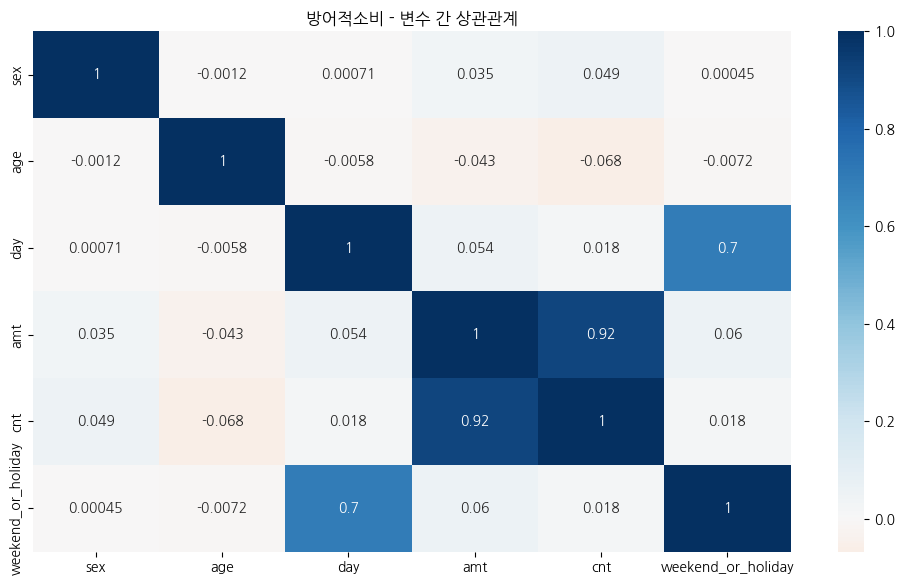

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Î≥µÏÇ¨Î≥∏ ÎßåÎì§Í∏∞
df_corr = df.copy()

# 2. ÌäπÏ†ï ÏÜåÎπÑÏú†Ìòï ÌïÑÌÑ∞ (Ïòà: Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ)
df_corr = df_corr[df_corr['ÏÜåÎπÑÏú†Ìòï'] == 'ÏæåÎùΩÏ†ÅÏÜåÎπÑ'].copy()

# 3. Î≤îÏ£ºÌòï ÎùºÎ≤® Ïù∏ÏΩîÎî©
for col in ['sex', 'age', 'day', 'weekend_or_holiday']:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# 4. Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
df_corr = df_corr.drop(columns=['ta_ymd', 'card_tpbuz_nm_2', 'ÏÜåÎπÑÏú†Ìòï'])

# 5. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='RdBu', center=0)
plt.title("Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ - Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.tight_layout()
plt.show()

## 1. ÏãúÍ≥ÑÏó¥Î°úÏÑú ÏÇ¨Ïö©ÏïàÌïòÍ≥† ÏÑ±Î≥Ñ ÎÇòÏù¥ ÏöîÏùº Í≥µÌú¥ÏùºÏó¨Î∂Ä Í≤∞Ï†úÍ∏àÏï°ÏúºÎ°ú ÏÜåÎπÑÌäπÏÑ±(Î∞©Ïñ¥Ï†Å/ÏæåÎùΩÏ†Å) ÏòàÏ∏°

In [37]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'])
df['weekday'] = df['ta_ymd'].dt.weekday
df['amt_log'] = df['amt'].apply(lambda x: np.log1p(x))

# 3. ÌÉÄÍ≤ü Î≥ÄÏàò: Ïã§Ïö© ÏÜåÎπÑ Ï†úÍ±∞ ÌõÑ Î∞©Ïñ¥=0, ÏæåÎùΩ=1
def binary_type(x):
    if 'Î∞©Ïñ¥' in x:
        return 0
    elif 'ÏæåÎùΩ' in x:
        return 1
    else:
        return np.nan  # Ïã§Ïö©/Í∏∞ÌÉÄÎäî Ï†úÍ±∞

df['ÏÜåÎπÑÏú†Ìòï_bin'] = df['ÏÜåÎπÑÏú†Ìòï'].apply(binary_type)
df = df.dropna(subset=['ÏÜåÎπÑÏú†Ìòï_bin'])  # Ïã§Ïö© Ï†úÍ±∞

# 4. ÌäπÏßï Î∞è Î≤îÏ£ºÌòï Î≥ÄÏàò Ï†ïÏùò
features = ['sex', 'age', 'weekday', 'weekend_or_holiday', 'amt_log']
categorical_features = ['sex', 'age', 'weekday', 'weekend_or_holiday']
X = df[features].copy()
y = df['ÏÜåÎπÑÏú†Ìòï_bin'].astype(int)

# Î≤îÏ£ºÌòï Ï≤òÎ¶¨
for col in categorical_features:
    X[col] = X[col].astype('category')

# 5. train-test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, reference=train_data)

# 7. Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'is_unbalance': True  # ‚úÖ ÏæåÎùΩ ÏÜåÎπÑÍ∞Ä ÏÜåÏàòÏùº Í≤ΩÏö∞Î•º ÎåÄÎπÑ
}

# 8. Î™®Îç∏ ÌïôÏäµ
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
        lgb.log_evaluation(period=10)
    ]
)

# 9. ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=["Î∞©Ïñ¥Ï†Å", "ÏæåÎùΩÏ†Å"]))

Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.521229
[20]	valid_0's binary_logloss: 0.514376
[30]	valid_0's binary_logloss: 0.510683
[40]	valid_0's binary_logloss: 0.508361
[50]	valid_0's binary_logloss: 0.506527
[60]	valid_0's binary_logloss: 0.504522
[70]	valid_0's binary_logloss: 0.502333
[80]	valid_0's binary_logloss: 0.500462
[90]	valid_0's binary_logloss: 0.499152
[100]	valid_0's binary_logloss: 0.497902
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.497902
              precision    recall  f1-score   support

         Î∞©Ïñ¥Ï†Å       0.62      0.61      0.62     16829
         ÏæåÎùΩÏ†Å       0.85      0.85      0.85     42143

    accuracy                           0.78     58972
   macro avg       0.73      0.73      0.73     58972
weighted avg       0.78      0.78      0.78     58972



## 2. ÏãúÍ≥ÑÏó¥Î°úÏÑú Ïπ¥ÌÖåÍ≥†Î¶¨(Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ/ÏæåÎùΩÏ†ÅÏÜåÎπÑ)Î≥ÑÎ°ú Ï†ÑÎÇ† ÎåÄÎπÑ ÏÜåÎπÑÍ∏àÏï° Ï¶ùÍ∞ê 0,1Î°ú Î∂ÑÎ•ò
ÎåÄÍ∏∞Í≥†Î†§X. ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî ÏÑ±Î≥Ñ ÎÇòÏù¥ Í≥µÌú¥ÏùºÏó¨Î∂Ä Í≤∞Ï†úÍ∏àÏï° -> Ï¶ùÍ∞êÏùÑ ÏòàÏ∏°

In [46]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 1. ÌïÑÌÑ∞ÎßÅ
df_filtered = df[(df['age'].isin([2, 3])) & (~df['ÏÜåÎπÑÏú†Ìòï'].str.contains('Ïã§Ïö©'))].copy()

# 2. ÎÇ†Ïßú Ï≤òÎ¶¨
df_filtered['ta_ymd'] = pd.to_datetime(df_filtered['ta_ymd'])

# 3. ÏùºÏûêÎ≥Ñ Í∑∏Î£π ÏßëÍ≥Ñ
grouped = (
    df_filtered.groupby(['ta_ymd', 'sex', 'age', 'ÏÜåÎπÑÏú†Ìòï'])
    .agg({'amt': 'sum', 'weekend_or_holiday': 'first'})
    .reset_index()
)

# 4. Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
reports = []

# 5. ÏÜåÎπÑÏú†ÌòïÎ≥Ñ Î∞òÎ≥µ
for category in grouped['ÏÜåÎπÑÏú†Ìòï'].unique():
    print(f"\n‚ñ∂ ÏÜåÎπÑÏú†Ìòï: {category}")
    
    # Ìï¥Îãπ ÏÜåÎπÑÏú†ÌòïÎßå ÏÑ†ÌÉù
    sub_df = grouped[grouped['ÏÜåÎπÑÏú†Ìòï'] == category].copy()
    
    # lag Î∞è Ï¶ùÍ∞ê Î≥ÄÏàò ÏÉùÏÑ±
    sub_df['amt_lag1'] = sub_df.groupby(['sex', 'age'])['amt'].shift(1)
    sub_df['Ï¶ùÍ∞ê'] = (sub_df['amt'] > sub_df['amt_lag1']).astype(int)
    sub_df = sub_df.dropna(subset=['amt_lag1'])  # Ï§ëÏöî! lag Ïù¥ÌõÑ dropna Ìï¥Ïïº Ïò§Î•ò Ïïà ÎÇ®
    
    # ÎèÖÎ¶ΩÎ≥ÄÏàò Î∞è ÌÉÄÍ≤ü
    X = sub_df[['sex', 'age', 'weekend_or_holiday', 'amt_lag1']]
    y = sub_df['Ï¶ùÍ∞ê']
    
    # Î≤îÏ£ºÌòï Ï≤òÎ¶¨
    for col in ['sex', 'age', 'weekend_or_holiday']:
        X[col] = X[col].astype('category')
    
    # ÌïôÏäµ Î∂ÑÎ¶¨
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=42, test_size=0.2
    )
    
    # Î™®Îç∏ ÌïôÏäµ
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["Í∞êÏÜå", "Ï¶ùÍ∞Ä"], output_dict=True)
    print(classification_report(y_test, y_pred, target_names=["Í∞êÏÜå", "Ï¶ùÍ∞Ä"]))
    
    # Í≤∞Í≥º Ï†ÄÏû•
    reports.append({
        'ÏÜåÎπÑÏú†Ìòï': category,
        'accuracy': report['accuracy'],
        'precision(Ï¶ùÍ∞Ä)': report['Ï¶ùÍ∞Ä']['precision'],
        'recall(Ï¶ùÍ∞Ä)': report['Ï¶ùÍ∞Ä']['recall'],
        'f1(Ï¶ùÍ∞Ä)': report['Ï¶ùÍ∞Ä']['f1-score']
    })

## ÏÜåÎπÑÏú†Ìòï Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ(Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ / ÏæåÎùΩÏ†ÅÏÜåÎπÑ)Î°ú ÎÇòÎàÑÏñ¥  Ï†ÑÎÇ†Î≥¥Îã§ **ÏÜåÎπÑÍ∏àÏï°Ïù¥ Ï¶ùÍ∞ÄÌñàÎäîÍ∞Ä(1) / Í∞êÏÜåÌñàÎäîÍ∞Ä(0)**Î•º Î∂ÑÎ•ò ÏòàÏ∏°.  (light GBMÏúºÎ°ú. Ïù¥ÏßÑÎ∂ÑÎ•ò. ÏãúÍ≥ÑÏó¥Î∞òÏòÅ)


‚ñ∂ ÏÜåÎπÑÏú†Ìòï: Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ
              precision    recall  f1-score   support

          Í∞êÏÜå       0.73      0.83      0.78       484
          Ï¶ùÍ∞Ä       0.78      0.66      0.72       440

    accuracy                           0.75       924
   macro avg       0.76      0.75      0.75       924
weighted avg       0.76      0.75      0.75       924


‚ñ∂ ÏÜåÎπÑÏú†Ìòï: ÏæåÎùΩÏ†ÅÏÜåÎπÑ
              precision    recall  f1-score   support

          Í∞êÏÜå       0.69      0.61      0.65       458
          Ï¶ùÍ∞Ä       0.66      0.73      0.69       466

    accuracy                           0.67       924
   macro avg       0.67      0.67      0.67       924
weighted avg       0.67      0.67      0.67       924



In [45]:
# ÏòàÏ∏°Í∞í
y_pred = model.predict(X_test)

# Í≤∞Í≥º Î≥¥Í∏∞ (X_testÎäî Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî ÌïÑÏöî)
result_df = X_test.copy()
result_df = result_df.reset_index(drop=True)
result_df['Ïã§Ï†úÍ∞í'] = y_test.reset_index(drop=True)
result_df['ÏòàÏ∏°Í∞í'] = y_pred

# Ïã§Ï†ú ÏÜåÎπÑÍ∏àÏï°Í≥º Ï†ÑÎÇ† ÏÜåÎπÑÍ∏àÏï° Í∞ôÏù¥ ÌôïÏù∏
sub_df_result = sub_df[['ta_ymd', 'sex', 'age', 'amt_lag1', 'amt', 'Ï¶ùÍ∞ê']].sort_values(by=['sex', 'age', 'ta_ymd'])

print(sub_df_result.head(10))

# amt > amt_lag1Ïùº ÎïåÎßå 1

       ta_ymd sex  age    amt_lag1       amt  Ï¶ùÍ∞ê
9  2022-01-02   F    2  22840027.0  16995061   0
17 2022-01-03   F    2  16995061.0  15079462   0
25 2022-01-04   F    2  15079462.0  16709239   1
33 2022-01-05   F    2  16709239.0  16629714   0
41 2022-01-06   F    2  16629714.0  19555668   1
49 2022-01-07   F    2  19555668.0  18119361   0
57 2022-01-08   F    2  18119361.0  18390698   1
65 2022-01-09   F    2  18390698.0  14779929   0
73 2022-01-10   F    2  14779929.0  17033480   1
81 2022-01-11   F    2  17033480.0  16337783   0


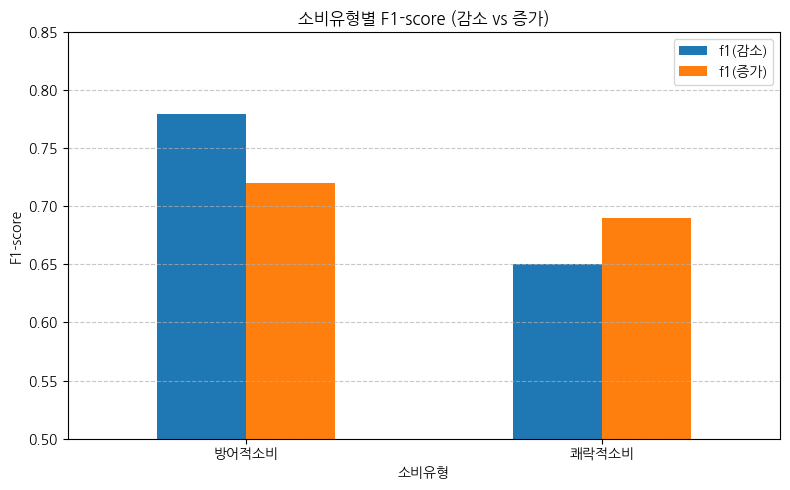

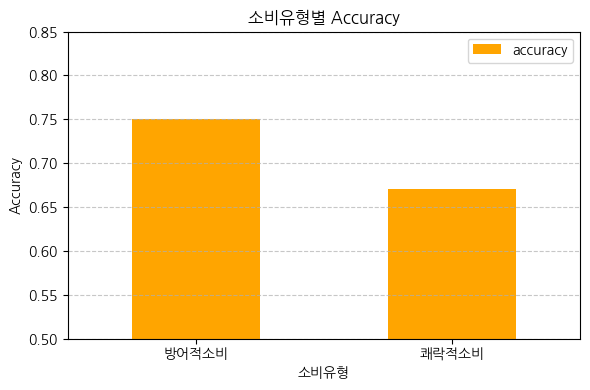

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# ÏÑ±Îä• ÏàòÎèô Ï†ïÎ¶¨
results = [
    {
        'ÏÜåÎπÑÏú†Ìòï': 'Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ',
        'precision(Í∞êÏÜå)': 0.73, 'recall(Í∞êÏÜå)': 0.83, 'f1(Í∞êÏÜå)': 0.78,
        'precision(Ï¶ùÍ∞Ä)': 0.78, 'recall(Ï¶ùÍ∞Ä)': 0.66, 'f1(Ï¶ùÍ∞Ä)': 0.72,
        'accuracy': 0.75
    },
    {
        'ÏÜåÎπÑÏú†Ìòï': 'ÏæåÎùΩÏ†ÅÏÜåÎπÑ',
        'precision(Í∞êÏÜå)': 0.69, 'recall(Í∞êÏÜå)': 0.61, 'f1(Í∞êÏÜå)': 0.65,
        'precision(Ï¶ùÍ∞Ä)': 0.66, 'recall(Ï¶ùÍ∞Ä)': 0.73, 'f1(Ï¶ùÍ∞Ä)': 0.69,
        'accuracy': 0.67
    }
]

# DataFrame Î≥ÄÌôò
df_scores = pd.DataFrame(results).set_index('ÏÜåÎπÑÏú†Ìòï')

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
df_scores[['f1(Í∞êÏÜå)', 'f1(Ï¶ùÍ∞Ä)']].plot(kind='bar', figsize=(8, 5), ylim=(0.5, 0.85))
plt.title('ÏÜåÎπÑÏú†ÌòïÎ≥Ñ F1-score (Í∞êÏÜå vs Ï¶ùÍ∞Ä)')
plt.ylabel('F1-score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Accuracy ÏãúÍ∞ÅÌôî
df_scores[['accuracy']].plot(kind='bar', figsize=(6, 4), ylim=(0.5, 0.85), color='orange')
plt.title('ÏÜåÎπÑÏú†ÌòïÎ≥Ñ Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

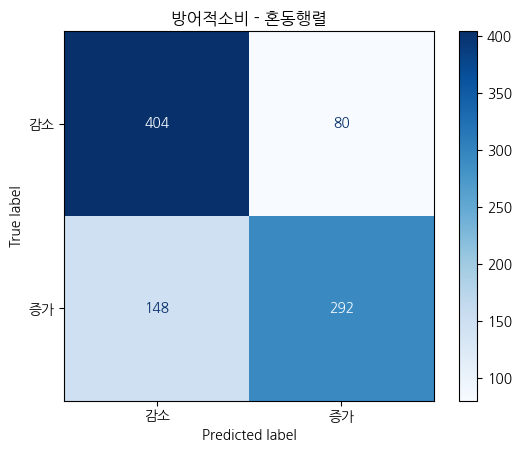

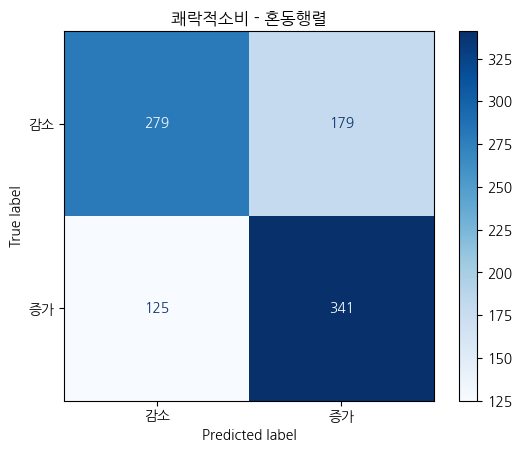

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for category in grouped['ÏÜåÎπÑÏú†Ìòï'].unique():
    sub_df = grouped[grouped['ÏÜåÎπÑÏú†Ìòï'] == category].copy()
    sub_df['amt_lag1'] = sub_df.groupby(['sex', 'age'])['amt'].shift(1)
    sub_df = sub_df.dropna()
    sub_df['Ï¶ùÍ∞ê'] = (sub_df['amt'] > sub_df['amt_lag1']).astype(int)
    
    X = sub_df[['sex', 'age', 'weekend_or_holiday', 'amt_lag1']]
    y = sub_df['Ï¶ùÍ∞ê']
    X[['sex', 'age', 'weekend_or_holiday']] = X[['sex', 'age', 'weekend_or_holiday']].astype('category')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
    model = lgb.LGBMClassifier(random_state=42, verbose=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Í∞êÏÜå", "Ï¶ùÍ∞Ä"])
    disp.plot(cmap="Blues")
    plt.title(f"{category} - ÌòºÎèôÌñâÎ†¨")
    plt.grid(False)
    plt.show()

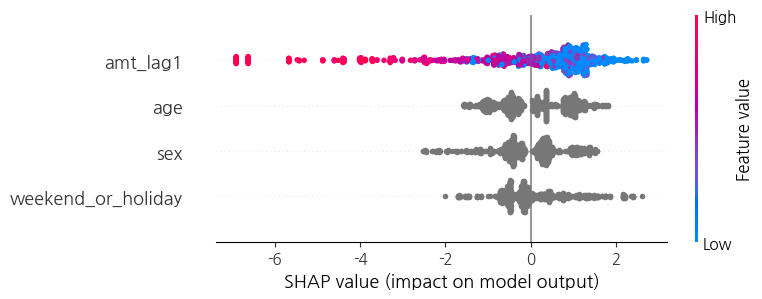

In [34]:
import shap

model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

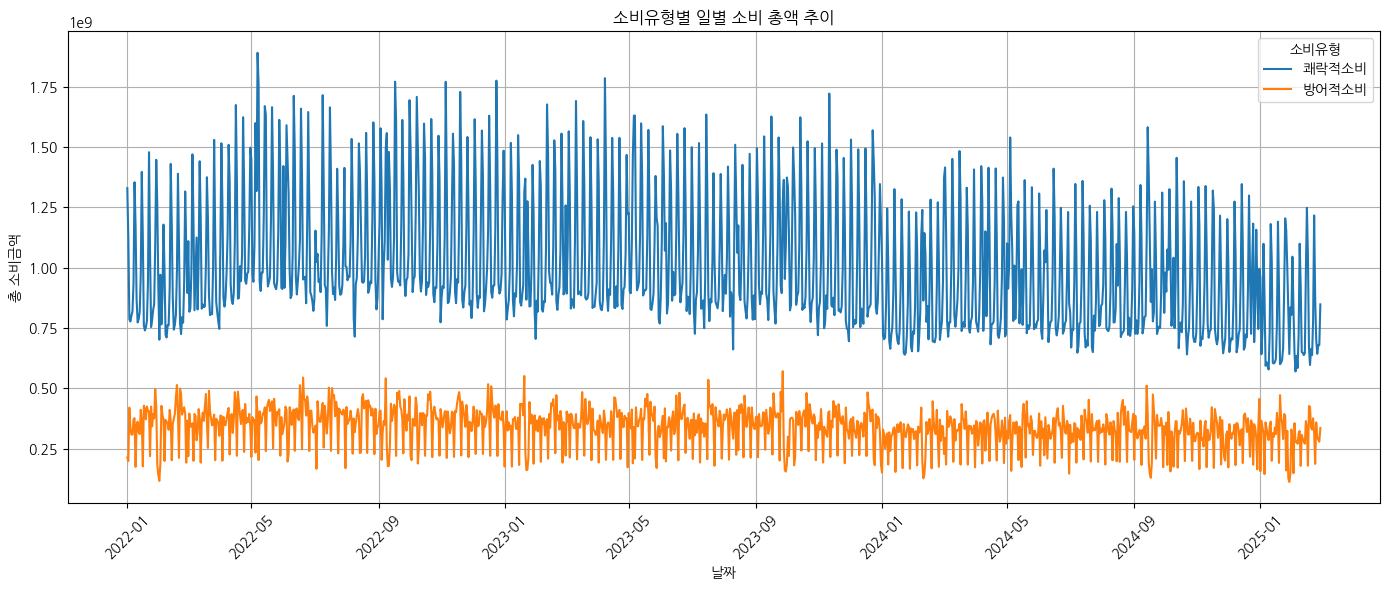

In [36]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='ta_ymd', y='amt', hue='ÏÜåÎπÑÏú†Ìòï', estimator='sum', ci=None)
plt.title("ÏÜåÎπÑÏú†ÌòïÎ≥Ñ ÏùºÎ≥Ñ ÏÜåÎπÑ Ï¥ùÏï° Ï∂îÏù¥")
plt.ylabel("Ï¥ù ÏÜåÎπÑÍ∏àÏï°")
plt.xlabel("ÎÇ†Ïßú")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
## Í≤∞Ï†úÌöüÏàòÎ°ú 

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 1. ÌïÑÌÑ∞ÎßÅ (20~30ÎåÄ + Ïã§Ïö©ÏÜåÎπÑ Ï†úÏô∏)
df_filtered = df[(df['age'].isin([2, 3])) & (~df['ÏÜåÎπÑÏú†Ìòï'].str.contains('Ïã§Ïö©'))].copy()

# 2. ÎÇ†Ïßú Ï≤òÎ¶¨
df_filtered['ta_ymd'] = pd.to_datetime(df_filtered['ta_ymd'])

# 3. ÏùºÏûêÎ≥Ñ Í≤∞Ï†úÌöüÏàò ÏßëÍ≥Ñ
grouped = (
    df_filtered.groupby(['ta_ymd', 'sex', 'age', 'ÏÜåÎπÑÏú†Ìòï'])
    .agg({'cnt': 'sum', 'weekend_or_holiday': 'first'})
    .reset_index()
)

# 4. Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
reports = []

# 5. ÏÜåÎπÑÏú†ÌòïÎ≥Ñ Î∞òÎ≥µ
for category in grouped['ÏÜåÎπÑÏú†Ìòï'].unique():
    print(f"\n‚ñ∂ ÏÜåÎπÑÏú†Ìòï: {category}")
    
    # ÏÜåÎπÑÏú†Ìòï ÏÑ†ÌÉù
    sub_df = grouped[grouped['ÏÜåÎπÑÏú†Ìòï'] == category].copy()
    
    # lag Î∞è Ï¶ùÍ∞ê ÏÉùÏÑ±
    sub_df['cnt_lag1'] = sub_df.groupby(['sex', 'age'])['cnt'].shift(1)
    sub_df['Ï¶ùÍ∞ê'] = (sub_df['cnt'] > sub_df['cnt_lag1']).astype(int)
    sub_df = sub_df.dropna(subset=['cnt_lag1'])
    
    # feature & target
    X = sub_df[['sex', 'age', 'weekend_or_holiday', 'cnt_lag1']]
    y = sub_df['Ï¶ùÍ∞ê']
    
    for col in ['sex', 'age', 'weekend_or_holiday']:
        X[col] = X[col].astype('category')
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=42, test_size=0.2
    )
    
    # Î™®Îç∏ ÌïôÏäµ
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # ÌèâÍ∞Ä
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["Í∞êÏÜå", "Ï¶ùÍ∞Ä"], output_dict=True)
    print(classification_report(y_test, y_pred, target_names=["Í∞êÏÜå", "Ï¶ùÍ∞Ä"]))
    
    # Í≤∞Í≥º Ï†ÄÏû•
    reports.append({
        'ÏÜåÎπÑÏú†Ìòï': category,
        'accuracy': report['accuracy'],
        'precision(Ï¶ùÍ∞Ä)': report['Ï¶ùÍ∞Ä']['precision'],
        'recall(Ï¶ùÍ∞Ä)': report['Ï¶ùÍ∞Ä']['recall'],
        'f1(Ï¶ùÍ∞Ä)': report['Ï¶ùÍ∞Ä']['f1-score']
    })


‚ñ∂ ÏÜåÎπÑÏú†Ìòï: Î∞©Ïñ¥Ï†ÅÏÜåÎπÑ
              precision    recall  f1-score   support

          Í∞êÏÜå       0.76      0.81      0.79       511
          Ï¶ùÍ∞Ä       0.75      0.69      0.71       413

    accuracy                           0.76       924
   macro avg       0.75      0.75      0.75       924
weighted avg       0.75      0.76      0.75       924


‚ñ∂ ÏÜåÎπÑÏú†Ìòï: ÏæåÎùΩÏ†ÅÏÜåÎπÑ
              precision    recall  f1-score   support

          Í∞êÏÜå       0.67      0.52      0.58       449
          Ï¶ùÍ∞Ä       0.62      0.75      0.68       475

    accuracy                           0.64       924
   macro avg       0.64      0.64      0.63       924
weighted avg       0.64      0.64      0.63       924



ÌèâÍ∑†Í∏àÏï°Îã®Í∞Ä, Í≤∞Ï†úÌöüÏàòÎ°ú Ìï¥ÏÑú Î¥£ÏùÑÎïå   
ÌöüÏàòÍ∞Ä Í∏∞Ïò®Ïóê ÏòÅÌñ•     
   
ÎåÄÍ∏∞Î≥¥Îã® ÎÇ†Ïî®, Í∏àÏï°Î≥¥Îã® ÌöüÏàò      
   
Í≤∞Ï†úÌöüÏàòÎûë ÏµúÍ≥†Í∏∞Ïò® ; 0.46   

In [ ]:
ÏæåÎùΩÏ†ÅÏÜåÎπÑÎßå ÌååÏïÖÌï¥ÏÑú Í±îÎÑ§Îßå Î∂ÑÏÑù